In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


# **Bank Marketing Model Performance Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv", delimiter=';')
df = pd.DataFrame(data)
df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

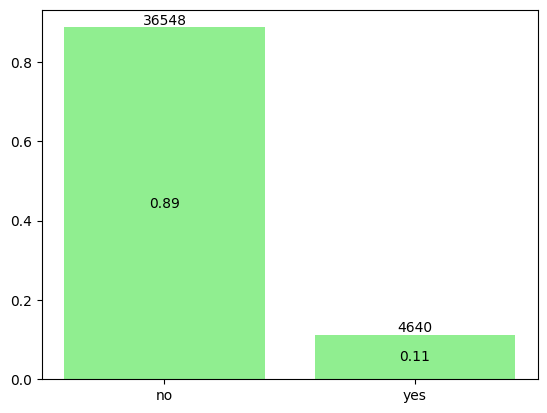

In [5]:
barplot = plt.bar(x = list(df['y'].unique()), height = list(df['y'].value_counts(normalize = True).values), fc = 'lightgreen' )
plt.bar_label(barplot, labels = list(df['y'].value_counts().values), label_type = "edge")
plt.bar_label(barplot, labels = list(round(df['y'].value_counts(normalize = True),2)), label_type = "center")
plt.show()


In [6]:
df_int = pd.DataFrame(df, columns = ['age', 'duration','campaign','pdays', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed'])
df_cat = pd.DataFrame(df, columns = ['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

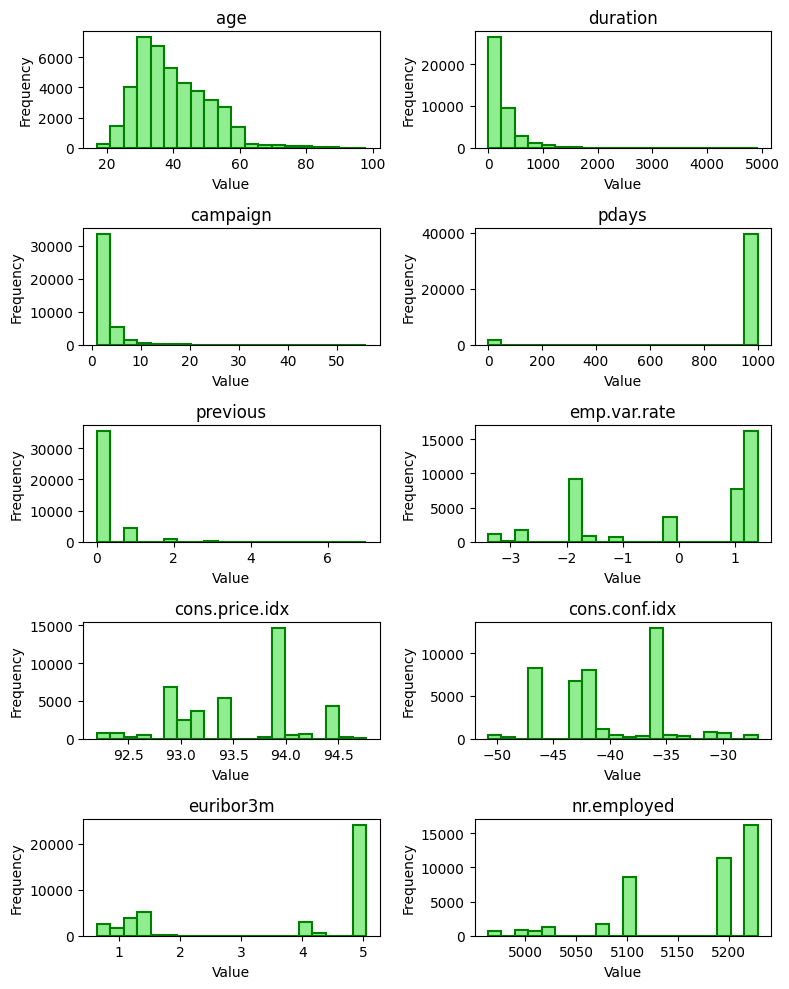

In [7]:
int_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

plt.figure(figsize=(8, 10))
for i, column in enumerate(int_columns, 1):
    plt.subplot(5, 2, i)
    plt.hist(df[column], bins=20, color='lightgreen', edgecolor='green', linewidth=1.5)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

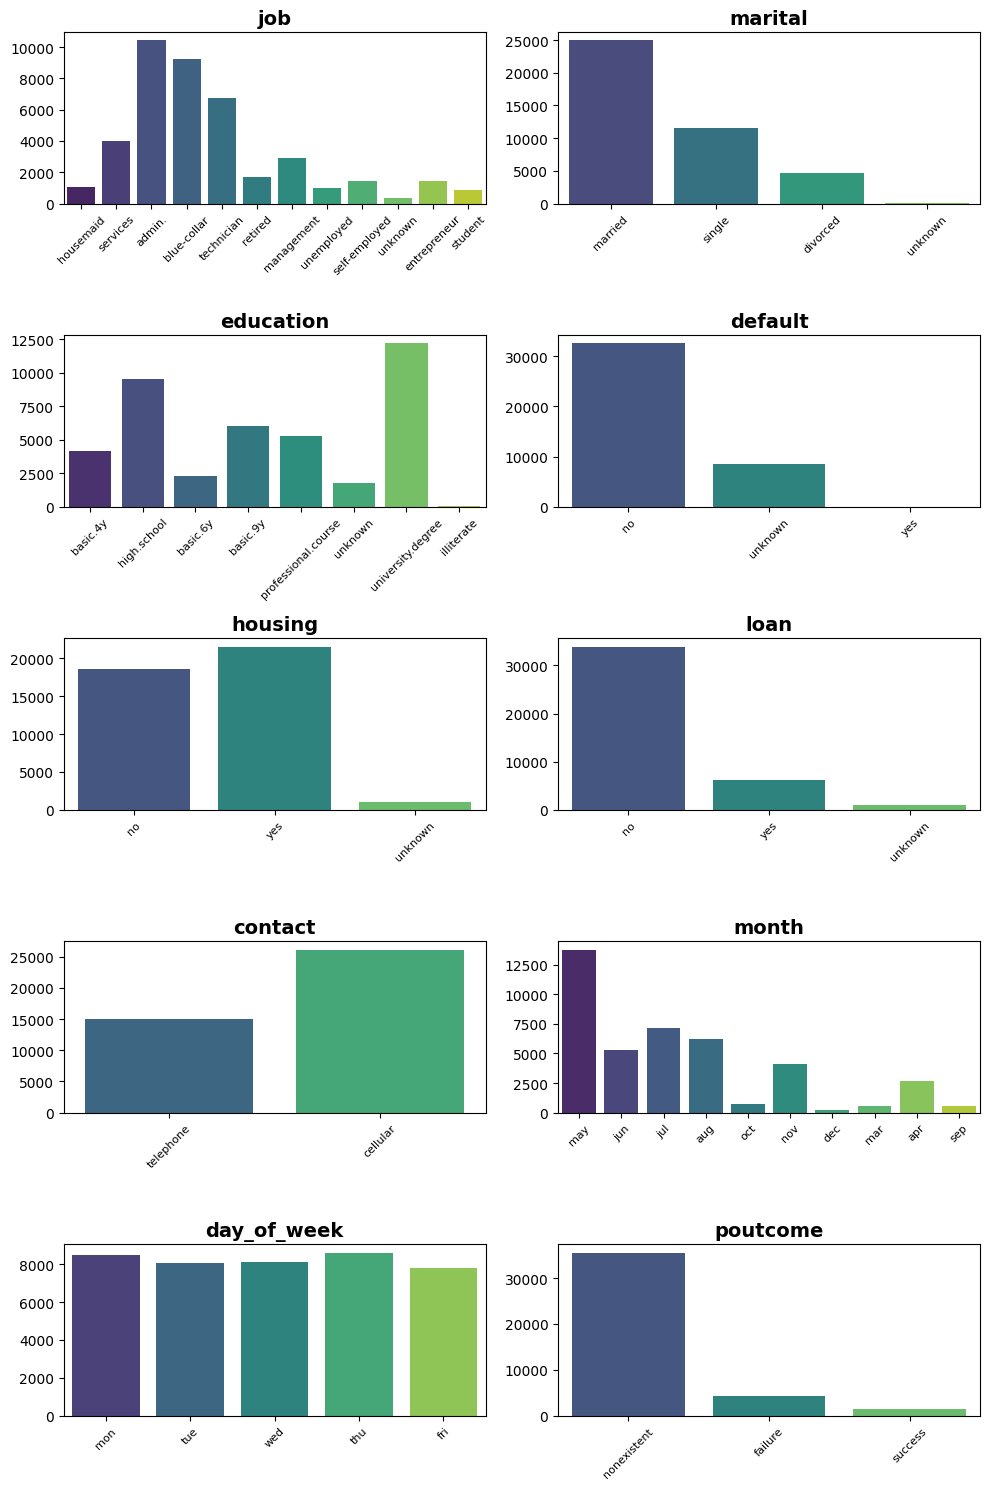

In [8]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'day_of_week', 'poutcome']

plt.figure(figsize=(10, 15))
for i, column in enumerate(cat_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(column, fontsize=14, fontweight='bold') 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(fontsize = 8, rotation=45)  

plt.tight_layout()
plt.show()

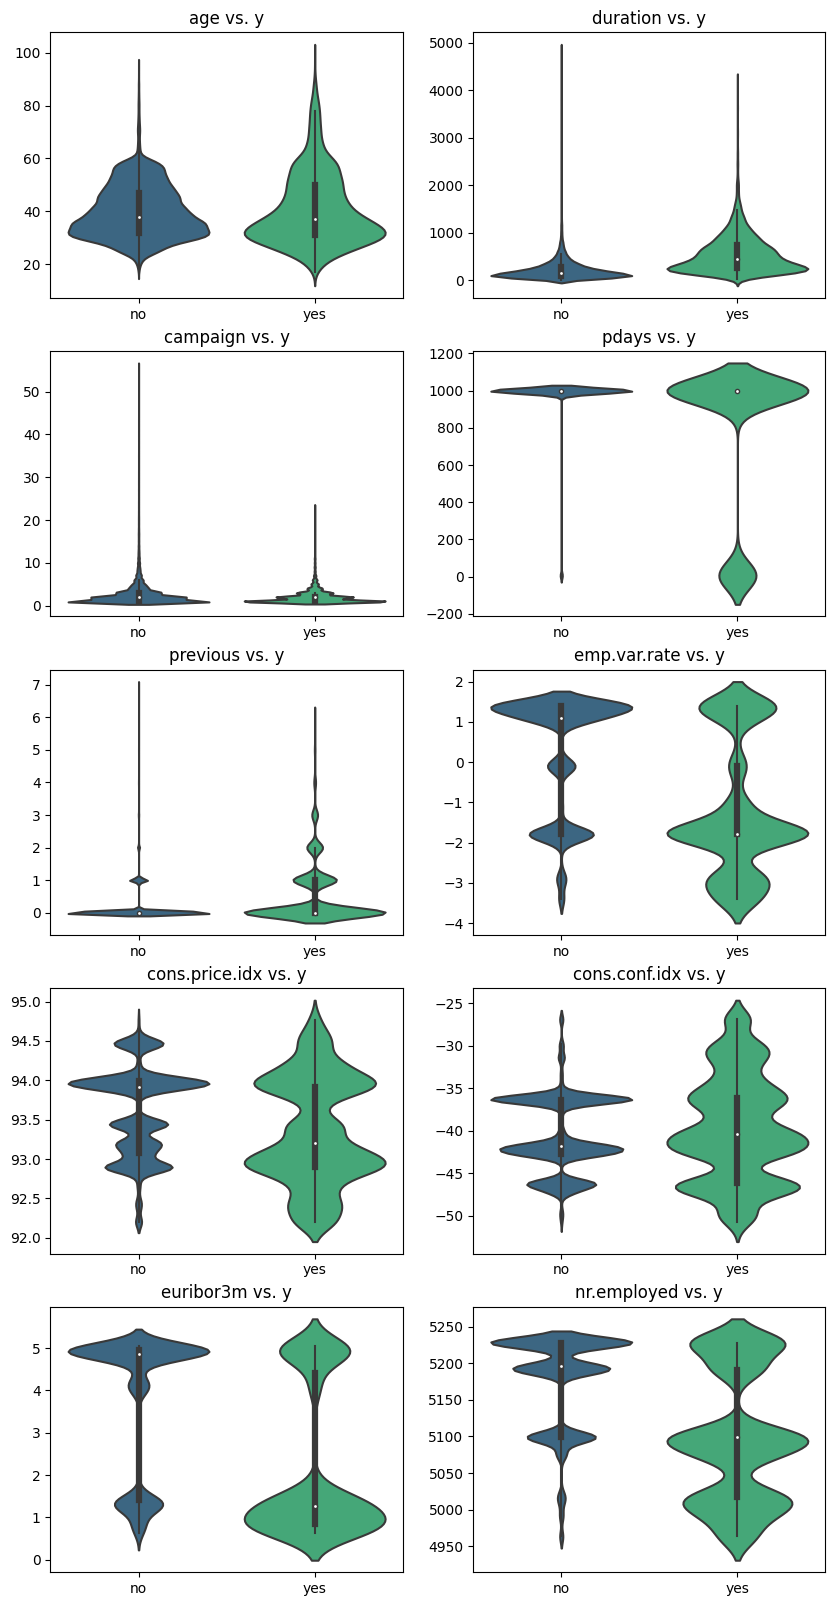

In [9]:
plt.figure(figsize=(10, 20))
for i, column in enumerate(df_int, 1):
    plt.subplot(5, 2, i)
    sns.violinplot(data= df, y=column, x ='y', palette='viridis',
                    scale="width")
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)

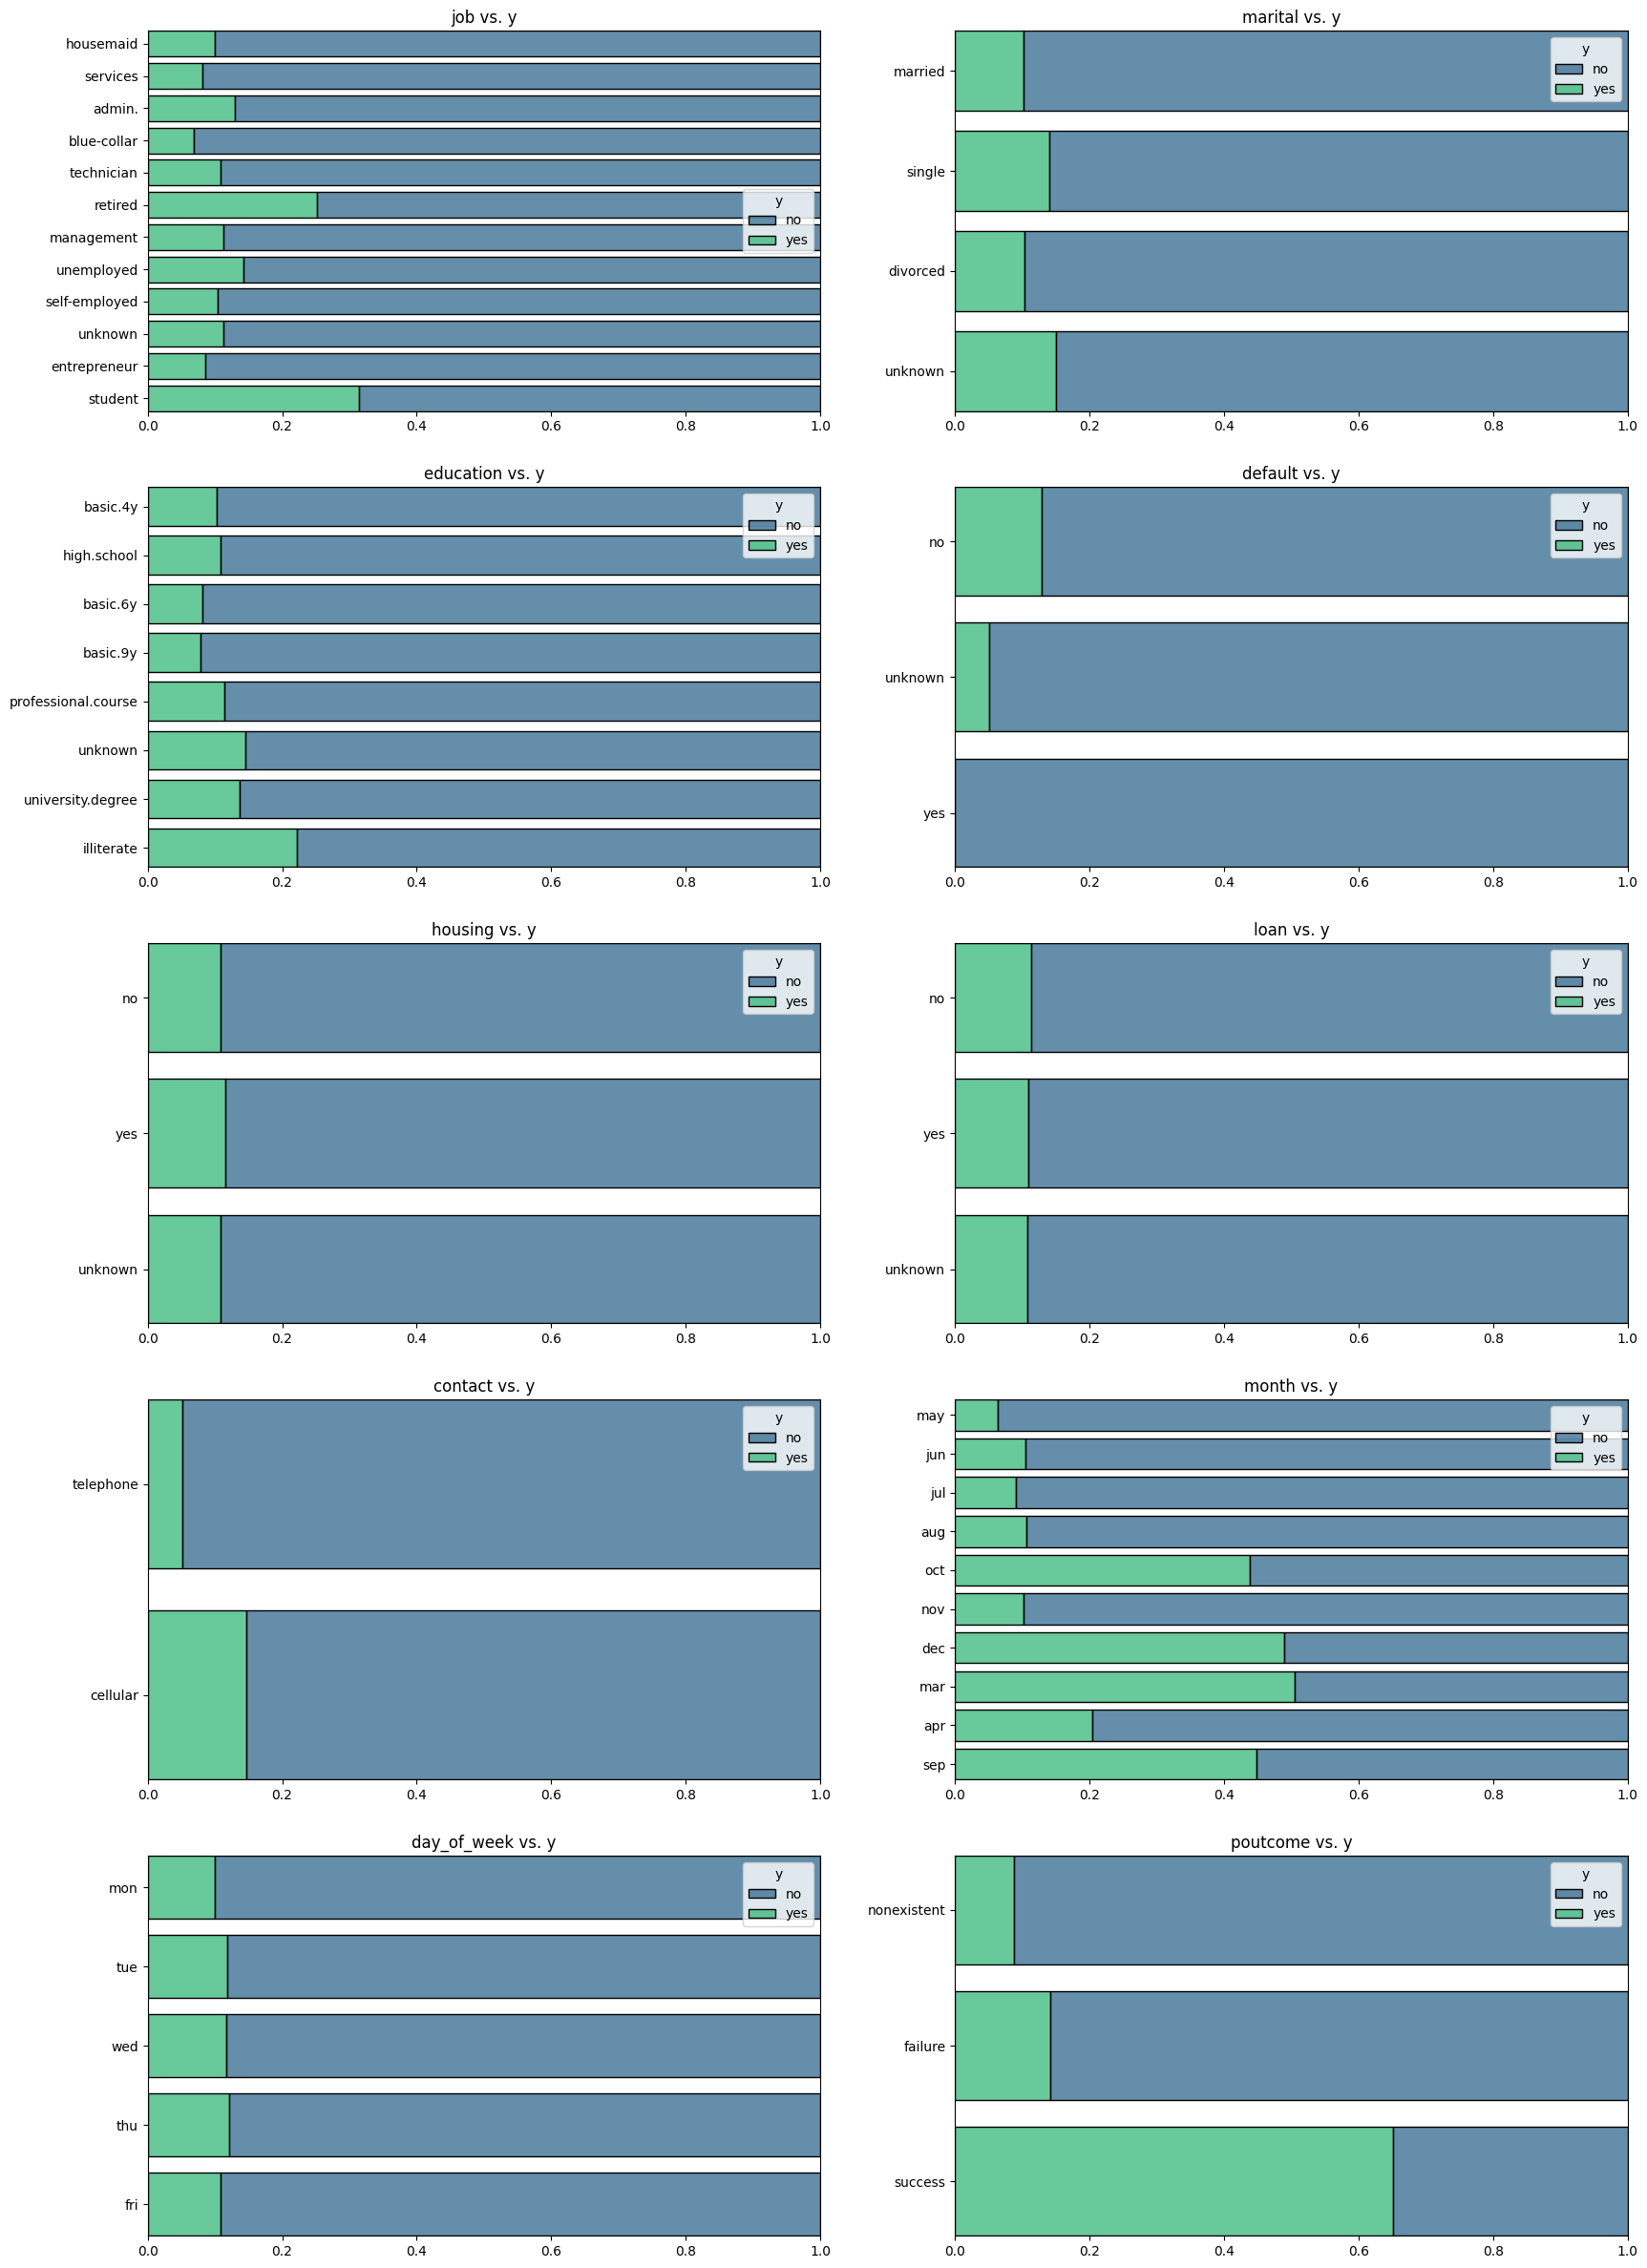

In [10]:
plt.figure(figsize=(20, 30))
for i, column in enumerate(df_cat, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df, y=column, hue='y', palette='viridis',stat="probability", multiple="fill", shrink = .8)
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)
    
    
plt.show()

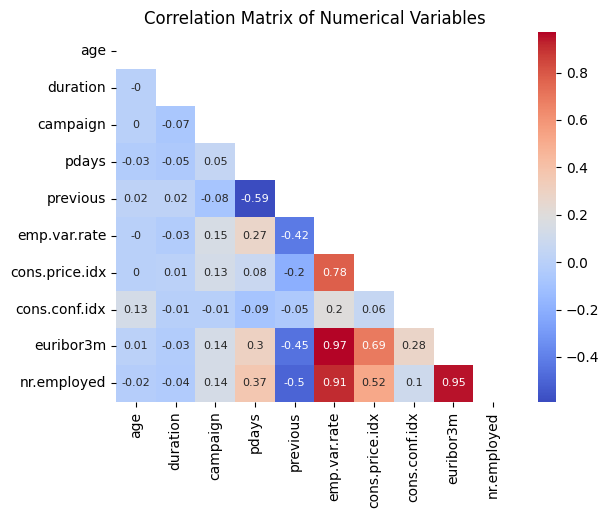

In [11]:
corr= round(df_int.corr(),2)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [12]:
df_2 = df.drop( columns=['euribor3m', 'nr.employed', 'duration','month','day_of_week'] )

In [13]:
df_2['education'] = df_2['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic.edu')
df_2['education'] = df_2['education'].replace(['unknown', 'illiterate'], 'other.edu')
df_2['education'].value_counts()

education
basic.edu              12513
university.degree      12168
high.school             9515
professional.course     5243
other.edu               1749
Name: count, dtype: int64

In [14]:
df_2 = df_2[df_2['marital'] != 'unknown']
df_2['marital'].value_counts().sort_index()

marital
divorced     4612
married     24928
single      11568
Name: count, dtype: int64

In [15]:
cat_age = [0, 25, 35,45,60,100]

df_2['age_cat'] = pd.cut(df_2['age'],cat_age)
df_2['age_cat'].value_counts().sort_index()


age_cat
(0, 25]       1664
(25, 35]     14809
(35, 45]     12831
(45, 60]     10896
(60, 100]      908
Name: count, dtype: int64

In [16]:
#for i, col in enumerate(df_2['age_cat'].unique().sort_values()):
    #df_2['age_cat'] = df_2['age_cat'].replace(col,i) 

#df_2['age_cat'].value_counts().sort_index()    

In [17]:
# def label_enc(df,col_name):
#     for i, col in enumerate(np.sort(df[col_name].unique())):
#         df[col_name] = df[col_name].replace(col,i) 
        


In [18]:
col_to_label = ['age_cat','job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'poutcome', 'y']
for c in col_to_label:
    for i, col in enumerate(np.sort(df_2[c].unique())):
        df_2[c] = df_2[c].replace(col,i) 

for c in col_to_label:
    print(df_2[c].value_counts().sort_index())    
    

age_cat
0     1664
1    14809
2    12831
3    10896
4      908
Name: count, dtype: int64
job
0     10408
1      9240
2      1453
3      1057
4      2921
5      1715
6      1416
7      3963
8       874
9      6731
10     1009
11      321
Name: count, dtype: int64
marital
0     4612
1    24928
2    11568
Name: count, dtype: int64
education
0    12493
1     9501
2     1740
3     5237
4    12137
Name: count, dtype: int64
default
0    32519
1     8586
2        3
Name: count, dtype: int64
housing
0    18578
1      989
2    21541
Name: count, dtype: int64
loan
0    33883
1      989
2     6236
Name: count, dtype: int64
contact
0    26091
1    15017
Name: count, dtype: int64
poutcome
0     4239
1    35501
2     1368
Name: count, dtype: int64
y
0    36480
1     4628
Name: count, dtype: int64


In [19]:
col_to_norm = ['campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx']

for c in col_to_norm:
    x_norm = (df_2[c] - df_2[c].mean())/df_2[c].std()
    df_2[c] = df_2[c].map(dict(zip(list(df_2[c]), x_norm)))

print(df_2)

       age  job  marital  education  default  housing  loan  contact  \
0       56    3        1          0        0        0     0        1   
1       57    7        1          1        1        0     0        1   
2       37    7        1          1        0        2     0        1   
3       40    0        1          0        0        0     0        1   
4       56    7        1          1        0        0     2        1   
...    ...  ...      ...        ...      ...      ...   ...      ...   
41183   73    5        1          3        0        2     0        0   
41184   46    1        1          3        0        0     0        0   
41185   56    5        1          4        0        2     0        0   
41186   44    9        1          3        0        0     0        0   
41187   74    5        1          3        0        2     0        0   

       campaign     pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0     -0.565972  0.195273 -0.349179         1      0.647

In [20]:
df_2.drop(columns=['age'])

y = df_2['y'].values
X = df_2.drop(['y'], axis=1).values          

In [21]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(), "Random Forrest": RandomForestClassifier(), "XGBoost":GradientBoostingClassifier() }
results = []
for model in models.values():
    kf = KFold(n_splits=5, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kf) # parament scoring domyślny - wbudowana funkcja
    # (można określić scoring = accuracy, roc_auc, precision...) można przetestować bez skalowania na zbiorach X, y
    results.append(cv_results)
'''Tablica wyników estymatora dla każej opcji walidacji krzyżowej"""
 """graficznym wynikiem jest wykres/boxplot/rozkład wartości wyników (5 n_splits dla każdego modelu)   '''
print(results)


[array([0.90063245, 0.90124057, 0.89856483, 0.90049872, 0.89794429]), array([0.88774021, 0.89090246, 0.89053758, 0.88906459, 0.88784819]), array([0.84650937, 0.84857699, 0.83860375, 0.84028707, 0.84649069]), array([0.88798346, 0.88859158, 0.88603746, 0.88796983, 0.88432064]), array([0.89880808, 0.90026757, 0.89832158, 0.9001338 , 0.89453838])]


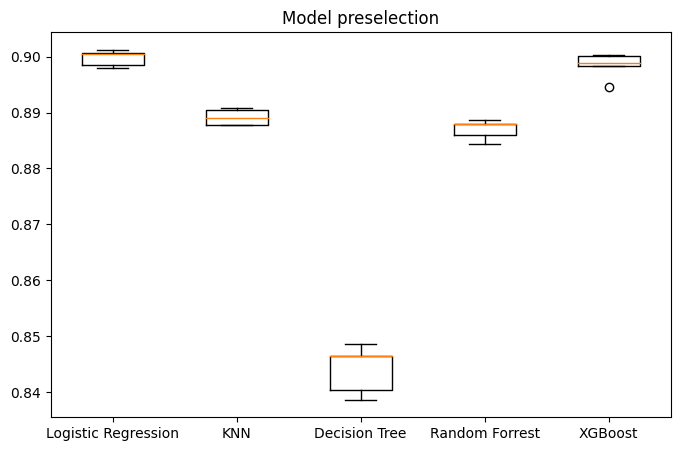

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot (results)
ax.set_xticklabels(models.keys())
ax.set_title("Model preselection")
plt.show()